<a href="https://colab.research.google.com/github/thecodeeagle/Genetic-Algorithm-Based-Ensemble-for-Driver-Distraction-Recognition/blob/main/InceptionV3%2BBiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np

In [ ]:
model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),   
)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
loaded = np.load("drive/My Drive/newdriver.npz")
train_images = loaded['train_images']
train_labels = loaded['train_labels']

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
model.summary()

In [ ]:
from keras.layers import LSTM, Bidirectional
x1 = tf.keras.layers.Reshape((5,10240))(model.output)
x2 = (Bidirectional(LSTM(14, return_sequences=True, input_shape=(5,10240))))(x1)
x3 = (Bidirectional(LSTM(14)))(x2)
x3 = Dense(1024, activation="relu")(x3)
out = (Dense(10, activation = "softmax"))(x3)
from keras import Model
model = Model(inputs = model.input, outputs = out)



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

import keras

In [ ]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
       
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "Training Loss")
            plt.plot(N, self.acc, label = "Training Accuracy")
            plt.title("Training Loss and Accuracy".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

In [ ]:
model.compile(optimizer= keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

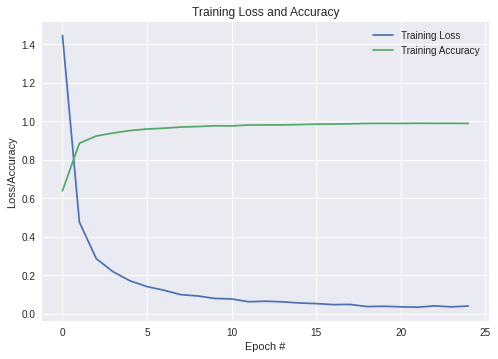

In [ ]:
output = model.fit(train_images, train_labels, epochs = 25, batch_size=64,callbacks=[plot_losses])

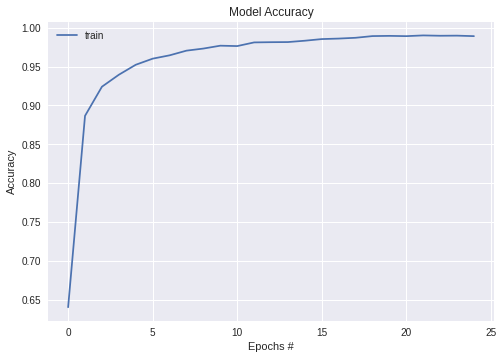

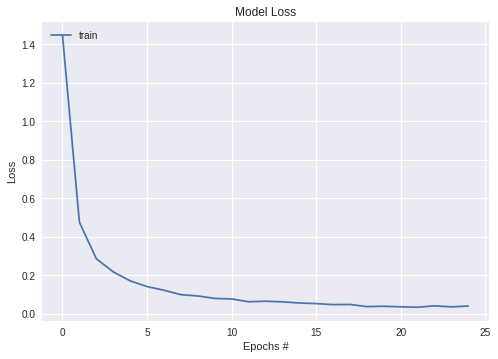

In [ ]:
plt.plot(output.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs #')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(output.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs #')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_images = loaded["test_images"]
test_labels = loaded["test_labels"]

In [ ]:
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
model.evaluate(test_images, test_labels)

144/144 [==============================] - 14s 73ms/step - loss: 0.2967 - acc: 0.9430


[0.2967163920402527, 0.9430186748504639]

In [ ]:
model.save("drive/My Drive/newd_inceptionv3")